## 영상정보처리 11주차 과제 템플리트 
이름: 김경민            
학번: 322000327




# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [96]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week11/
!pwd

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week11
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week11


In [97]:
image_path_airplane = '../Dongkeun-OpenCV-ImgData/airplane_bw.png'
image_path_horse = '../Dongkeun-OpenCV-ImgData/horse_bw.png'

다음 두 개의 이미지에 대해 스켈레톤을 구하는 프로세스를 작성하고, 결과를 가시화하시오.  

입력 이미지 - 이미지 폴더에 없는 경우, 첨부된 이미지를 다운받아 폴더에 넣고 실행하기
- airplane_bw.png
- horse_bw.png

In [98]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


In [99]:
# matplot grayscale display
def show_with_matplotlib_gray_jh(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

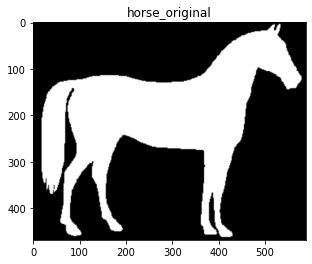

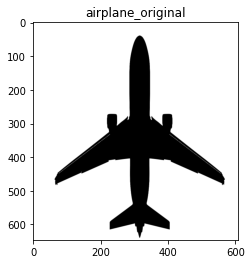

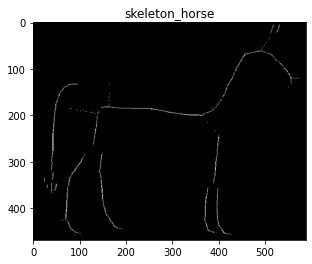

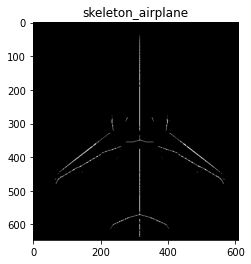

In [117]:
scr_horse = cv2.imread(image_path_horse,cv2.IMREAD_GRAYSCALE)
scr_air = cv2.imread(image_path_airplane,cv2.IMREAD_GRAYSCALE)

show_with_matplotlib_gray_jh(scr_horse, "horse_original")
print()
show_with_matplotlib_gray_jh(scr_air,"airplane_original")

ret_air, img_air = cv2.threshold(scr_air, 128, 255, cv2.THRESH_BINARY_INV)

skel_h = np.zeros(scr_horse.shape, np.uint8)
skel_a = np.zeros(img_air.shape, np.uint8)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3)) 


while True:
  erode1 = cv2.erode(scr_horse,kernel)
  opening1 = cv2.morphologyEx(erode1, cv2.MORPH_OPEN, kernel)
  tmp1 = cv2.subtract(erode1, opening1)
  skel_h = cv2.bitwise_or(skel_h,tmp1)
  scr_horse = erode1.copy()
  if cv2.countNonZero(scr_horse)==0:
    break

print()
show_with_matplotlib_gray_jh(skel_h, "skeleton_horse")



while True:
  erode2 = cv2.erode(img_air,kernel)

  opening2 = cv2.morphologyEx(erode2, cv2.MORPH_OPEN, kernel)

  tmp2 = cv2.subtract(erode2, opening2)

  skel_a = cv2.bitwise_or(skel_a,tmp2)
  img_air = erode2.copy()

  if cv2.countNonZero(img_air)==0:
    break

print()    
show_with_matplotlib_gray_jh(skel_a,"skeleton_airplane")




## 문제 2

"2021-1 ImgProc JB-CH07-JHU2104-V1.pdf" 에서 저자 구현 코드와 opencv 함수를 이용하는 방법 둘 다 이용해서 예시를 보여주고 있습니다. 저자 구현 코드와 opencv 를 이용한 방법의 결과를 디스플레이하고, 두 결과를 픽셀 단위로 비교하여 몇 개의 픽셀이 다른 지 계산하고, 픽셀이 다른 경우, 다른 부분만을 영상을 만들어 디스플레이 하시오. 
- 필요한 이미지는 '../Dongkeun-OpenCV-ImgData' 에 복사하여 넣어서 수행
 
1. 예제 7.2.5 (소벨 엣지 검출)
2. 예제 7.2.6 (라플라시안 엣지 검출)
3. 예제 7.2.8 (캐니 엣지 검출)


1. 예제 7.2.5 (소벨 엣지 검출)

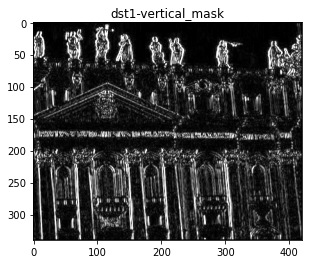

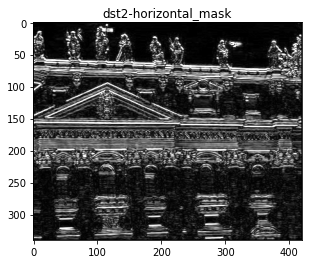

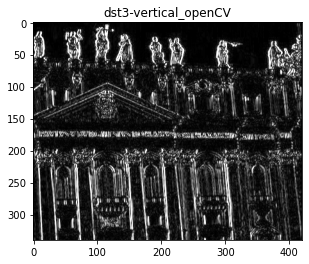

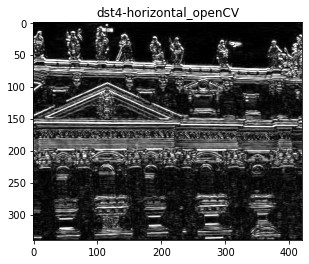

In [102]:
import numpy as np, cv2

# 회선 수행 함수
def filter(image, mask):

    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1] // 2, mask.shape[0] // 2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1               # 관심영역 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1               # 관심영역 너비 범위

            roi = image[y1:y2, x1:x2].astype("float32")         # 관심영역 형변환
            tmp = cv2.multiply(roi, mask)                       # 회선 적용
            dst[i, j] = cv2.sumElems(tmp)[0]                    # 출력화소 저장

    return dst                     # 자료형 변환하여 반환


def diiferential(image, data1, data2):
  mask1 = np.array(data1, np.float32).reshape(3,3)
  mask2 = np.array(data2, np.float32).reshape(3,3)

  dst1 = filter(image, mask1)  # 위에서 구현한 회선 함수 호출
  dst2 = filter(image, mask2)
  dst1, dst2 = np.abs(dst1), np.abs(dst2)
  dst = cv2.magnitude(dst1,dst2) #  두 행렬 크기 계산

  dst = np.clip(dst, 0, 255).astype('uint8')
  dst1 = np.clip(dst1, 0, 255).astype('uint8')
  dst2 = np.clip(dst2, 0, 255).astype('uint8')

  return dst,dst1,dst2


image = cv2.imread('../Dongkeun-OpenCV-ImgData/edge.jpg',cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data1 = [-1,0,1,    # 수직 소벨 마스크
         -2,0,2,
         -1,0,1]

data2 = [-1,-2,-1,  # 수평 소벨 마스크
         0,0,0,
         1,2,1]


dst, dst1, dst2 = diiferential(image, data1, data2)

dst3 = cv2.Sobel(np.float32(image), cv2.CV_32F,1,0,3) # x방향 미분
dst4 = cv2.Sobel(np.float32(image), cv2.CV_32F,0,1,3) # y방향 미분
dst3 = cv2.convertScaleAbs(dst3)
dst4 = cv2.convertScaleAbs(dst4)

show_with_matplotlib_gray_jh(dst1,"dst1-vertical_mask")
show_with_matplotlib_gray_jh(dst2,"dst2-horizontal_mask")
show_with_matplotlib_gray_jh(dst3,"dst3-vertical_openCV")
show_with_matplotlib_gray_jh(dst4,"dst4-horizontal_openCV")


number of wrong pixel:  582


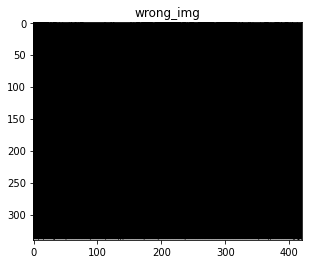

number of wrong pixel:  653


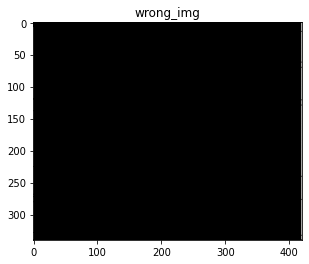

In [103]:
def compare_mask_opencv(img1, img2):
  count_wrong = 0

  if img1.shape != img2.shape:
    print("img1.shape = ", img1.shape, " and img2.shape = ", img2.shape, ' are different') 
    return False

  wrong_img = np.zeros(img1.shape, np.uint8)

  for i in range(0, img1.shape[0]):
    for j in range(0, img1.shape[1]):
      if img1[i,j] != img2[i,j]:
        count_wrong = count_wrong + 1
        wrong_img[i, j] = (255)
        continue

  return count_wrong, wrong_img

def show_compare_result(count_wrong,wrong_img):
  print("number of wrong pixel: ",count_wrong)
  if(count_wrong==0):
    show_with_matplotlib_gray_jh(wrong_img,"Two images are same")
  else:
    show_with_matplotlib_gray_jh(wrong_img,"wrong_img")


count_wrong, wrong_img = compare_mask_opencv(dst1, dst3)
show_compare_result(count_wrong,wrong_img)


count_wrong, wrong_img = compare_mask_opencv(dst2, dst4)
show_compare_result(count_wrong,wrong_img)



2. 예제 7.2.6 (라플라시안 엣지 검출)


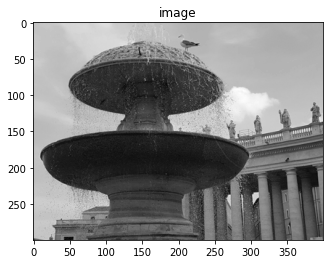

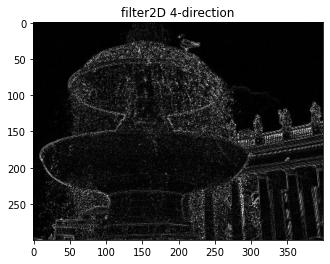

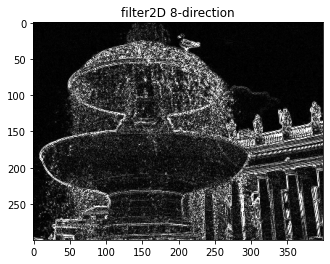

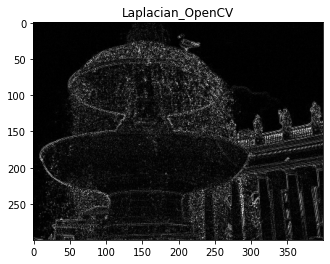

In [104]:
image = cv2.imread('../Dongkeun-OpenCV-ImgData/laplacian.jpg',cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data1 = [[0, 1, 0],    # 수직 소벨 마스크
         [1, -4, 1],
         [0, 1, 0]]

data2 = [[-1,-1,-1],  # 수평 소벨 마스크
         [-1,8,-1],
         [-1,-1,-1]]

mask4 = np.array(data1, np.int16)
mask8 = np.array(data2, np.int16)


dst1 = cv2.filter2D(image, cv2.CV_16S, mask4)
dst2 = cv2.filter2D(image, cv2.CV_16S, mask8)
dst3 = cv2.Laplacian(image, cv2.CV_16S, 1)

show_with_matplotlib_gray_jh(image,"image")
show_with_matplotlib_gray_jh(cv2.convertScaleAbs(dst1),"filter2D 4-direction")
show_with_matplotlib_gray_jh(cv2.convertScaleAbs(dst2),"filter2D 8-direction")
show_with_matplotlib_gray_jh(cv2.convertScaleAbs(dst3),"Laplacian_OpenCV")

number of wrong pixel:  0


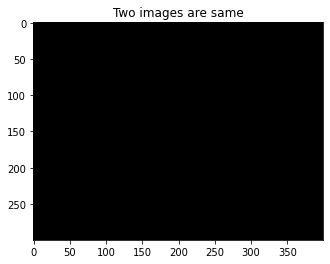

In [108]:
count_wrong, wrong_img = compare_mask_opencv(dst1, dst3)
show_compare_result(count_wrong,wrong_img)

3. 예제 7.2.8 (캐니 엣지 검출)

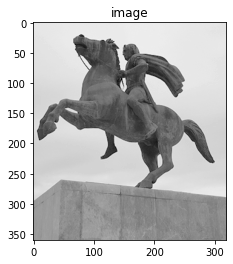

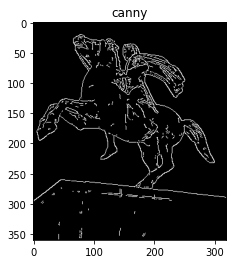

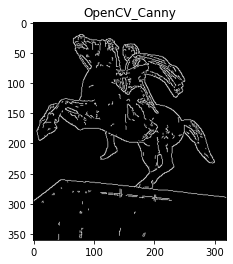

In [106]:
from inspect import indentsize
def nonmax_suppression(sobel, direct):			#비 최대치 억제 함수
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):			# 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]
            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0
            
    return dst


def trace(max_sobel, i, j, low):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255

        trace(max_sobel, i - 1, j - 1, low)				# 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low)
        trace(max_sobel, i + 1, j - 1, low)
        trace(max_sobel, i - 1, j    , low)
        trace(max_sobel, i + 1, j    , low)
        trace(max_sobel, i - 1, j + 1, low)
        trace(max_sobel, i    , j + 1, low)
        trace(max_sobel, i + 1, j + 1, low)


def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low)  # 추적 시작
  

image = cv2.imread('../Dongkeun-OpenCV-ImgData/canny.jpg',cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

pos_ck = np.zeros(image.shape[:2], np.uint8)
canny = np.zeros(image.shape[:2], np.uint8)

## canny 엣지 검출
gaus_img = cv2.GaussianBlur(image, (5,5), 0.3)
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F,1,0,3) # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F,0,1,3) # y방향 마스크
#sobel = cv2.magnitude(Gx,Gy)
sobel = np.fabs(Gx) + np.fabs(Gy)


directs = cv2.phase(Gx,Gy) / (np.pi/4)
directs = directs.astype(int) % 4
max_sobel = nonmax_suppression(sobel, directs)
hysteresis_th(max_sobel, 100, 150)

canny2 = cv2.Canny(image, 100, 150)

show_with_matplotlib_gray_jh(image,"image")
show_with_matplotlib_gray_jh(canny,"canny")
show_with_matplotlib_gray_jh(canny2,"OpenCV_Canny")

number of wrong pixel:  1944


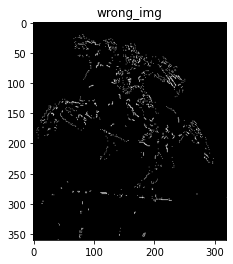

In [109]:
count_wrong, wrong_img = compare_mask_opencv(canny, canny2)
show_compare_result(count_wrong,wrong_img)